# 국제 상품 가격 데이터
파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 다루는 방법

* 국제 금가격 (LBM, 런던금은시장)
* 국제 은 가격 (LBMA, 런던 금시장협회)
* 국제 구리 가격 (LME, 런던 금속 거래소)
* 국제 원유가격 (서부 텍사스 중질유, 두바이유, 북해 브렌트유)

<img src="http://i.imgur.com/qVjtvea.png" >

### 2017 http://fb.com/financedata

(참고) rcParams
https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

In [2]:
!pip3 install pandas_datareader

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import pandas_datareader as pdr

- DataReader라는 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공

# 국제 금가격 (런던 금시장)
Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
* (HSBC, 도이치은행 등) 5개 은행이 회의를 통해 Gold Fixing Price 발표
* 하루에 두 번 (10:30 AM, 3:00 PM 런던시간)

FRED (세인트루이스 연방준비은행 경제 데이터)
* https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM
* https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM 

In [5]:
df_gold = pdr.DataReader('GOLDAMGBD228NLBM', 'fred', start='2000-01-01')

print('row count:', len(df_gold))
df_gold.tail(10)

row count: 5367


,GOLDAMGBD228NLBM
DATE,
2020-07-15,1809.30
2020-07-16,1804.60
2020-07-17,1802.90
2020-07-20,1810.30
2020-07-21,1823.20
2020-07-22,1851.00
2020-07-23,1882.35
2020-07-24,1893.85
2020-07-27,1940.55


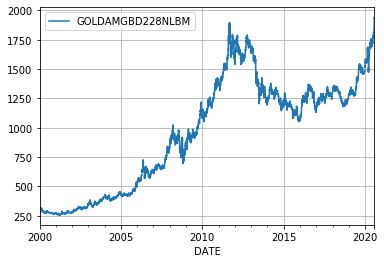

In [6]:
df_gold.plot()

# 국제 은 가격
* https://www.quandl.com/ 다양한 금융, 경제 데이터와 API를 제공)
*  "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격 

In [5]:
# 영국 은(silver)
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', start='2000-01-01')

print('row count:', len(df_silver))
df_silver.tail(10)

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

In [6]:
df_silver['USD'].plot()

NameError: name 'df_silver' is not defined

# 국제 구리 가격
* 런던 금속 거래소(London Metal Exchange), 전 세계 비철금속거래의 지표
* Cash(현금가격), 3Months(3개월 선물가격), 15Months(15개월 선물가격) 등  

In [7]:
# LME 구리 가격
df_copper = pdr.DataReader('LME/PR_CU', 'quandl', start='2000-01-01')

print('row count:', len(df_copper))
df_copper.tail(10)

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

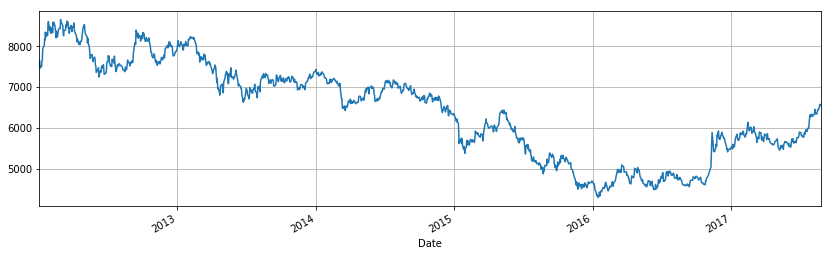

In [8]:
df_copper['CashSeller&Settlement'].plot()

# 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표 
1. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
1. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.
* 서부 텍사스 중질유(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [7]:
# 서부 텍사스 중질유(WTI Crude), monthly
df_wt = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01')

print('row count:', len(df_wt))
df_wt.tail(10)

row count: 246


,POILWTIUSDM
DATE,
2019-09-01,56.857143
2019-10-01,53.979130
2019-11-01,57.110476
2019-12-01,59.857727
2020-01-01,57.714783
2020-02-01,50.601500
2020-03-01,29.877273
2020-04-01,16.807273
2020-05-01,28.794762


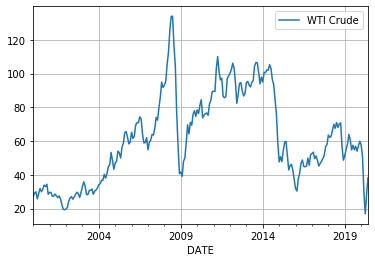

In [8]:
df_wt.columns = ['WTI Crude']
df_wt.plot()

In [9]:
df_wt.tail(10)

,WTI Crude
DATE,
2019-09-01,56.857143
2019-10-01,53.979130
2019-11-01,57.110476
2019-12-01,59.857727
2020-01-01,57.714783
2020-02-01,50.601500
2020-03-01,29.877273
2020-04-01,16.807273
2020-05-01,28.794762


In [12]:
# 두바이유 (Dubai Crude), monthly
df_du = pdr.DataReader('POILDUBUSDM', 'fred', start='2000-01-01')

print('row count:', len(df_du))
df_du.tail(10)

row count: 238


,POILDUBUSDM
DATE,
2019-01-01,58.673478
2019-02-01,64.186000
2019-03-01,66.804762
2019-04-01,70.642273
2019-05-01,69.370870
2019-06-01,61.214000
2019-07-01,62.906957
2019-08-01,58.699545
2019-09-01,60.841429


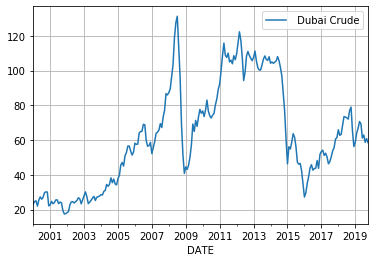

In [13]:
df_du.columns = [' Dubai Crude']
df_du.plot()

# 두 가지 이상의 유가 보기

DataReader 함수의 항목을 리스트로 전달하면, 한번에 여러 항목의 데이터를 가져올 수 있다

In [14]:
# POILDUBUSDM: 두바이유
# POILWTIUSDM: 서부 텍사스 중질유

df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'], 'fred', start='2000-01-01')

print('row count:', len(df_oil))
df_oil.tail(10)

row count: 238


,POILDUBUSDM,POILWTIUSDM
DATE,,
2019-01-01,58.673478,51.357391
2019-02-01,64.186000,54.986000
2019-03-01,66.804762,58.153810
2019-04-01,70.642273,63.875909
2019-05-01,69.370870,60.733478
2019-06-01,61.214000,54.677000
2019-07-01,62.906957,57.508696
2019-08-01,58.699545,54.839091
2019-09-01,60.841429,56.857143


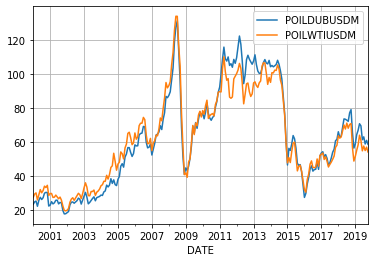

In [15]:
df_oil.plot()

# 두 가격의 차이
두 가격을 함께 놓고 보니, 두바이유와 서부 텍사스 중질유의 가격이 거의 같으나 약간 차이가 있다. 

차이를 구해서 상세하게 살펴보자

In [16]:
df_oil['diff'] = df_oil['POILDUBUSDM'] -  df_oil['POILWTIUSDM']
df_oil.tail(10)

,POILDUBUSDM,POILWTIUSDM,diff
DATE,,,
2019-01-01,58.673478,51.357391,7.316087
2019-02-01,64.186000,54.986000,9.200000
2019-03-01,66.804762,58.153810,8.650952
2019-04-01,70.642273,63.875909,6.766364
2019-05-01,69.370870,60.733478,8.637391
2019-06-01,61.214000,54.677000,6.537000
2019-07-01,62.906957,57.508696,5.398261
2019-08-01,58.699545,54.839091,3.860455
2019-09-01,60.841429,56.857143,3.984286


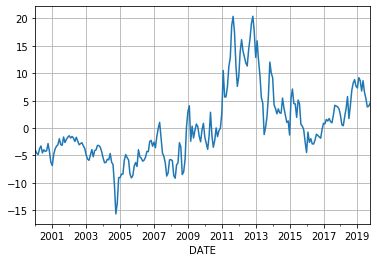

In [17]:
df_oil['diff'].plot()

가격의 차이를 좀 더 분명하게 표현해 보자. 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시한다.

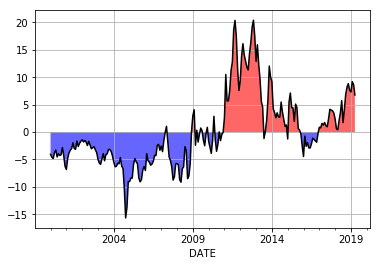

In [20]:
ax = df_oil['diff'].plot(color='k')

x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, 0, y, where=y > 0, facecolor='r', alpha=0.6, interpolate=True)
ax.fill_between(x, 0, y, where=y <= 0, facecolor='b', alpha=0.6, interpolate=True)

### 2017 http://fb.com/financedata